In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
# plt.rcParams['figure.figsize']=20,12
import plotly
import plotly.express as px
import plotly.graph_objects as go #allows us to use plotly in object-oriented way instead of a functional way

import cufflinks as cf #binds pandas and plotly together
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium #helps us to use maps 

In [92]:
pyo.init_notebook_mode(connected = True) #connecting plotly with jupyter notebook
cf.go_offline()

In [93]:
!dir

 Volume in drive D is DATA
 Volume Serial Number is D237-2D5C

 Directory of D:\College\GITHUB REPOS\IPYNB-Notebooks\covid-19 INDIA

18-04-2020  17:57    <DIR>          .
18-04-2020  17:57    <DIR>          ..
18-04-2020  17:01    <DIR>          .ipynb_checkpoints
18-04-2020  17:10            15,279 Covid cases in India.xlsx
18-04-2020  17:10    <DIR>          COVID-19-Time-Series-Forecasting-with-Data-Analysis
18-04-2020  17:10           367,467 COVID19_line_list_data.csv
18-04-2020  17:10         3,071,337 COVID19_open_line_list.csv
18-04-2020  17:10           392,988 covid_19_data.csv
18-04-2020  17:10            10,490 Indian Coordinates.xlsx
18-04-2020  17:10            18,705 per_day_cases.xlsx
18-04-2020  17:10           484,987 recent_covid_19_data.csv
18-04-2020  17:10         1,305,837 time-series-19-covid-combined.csv
18-04-2020  17:10            66,592 time_series_covid_19_confirmed.csv
18-04-2020  17:10            62,371 time_series_covid_19_deaths.csv
18-04-2020  17:10   

In [94]:
df = pd.read_excel("Covid cases in India.xlsx")

In [95]:
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [96]:
df.drop(['S. No.'], axis = 1,inplace=True)

In [97]:
df['Total'] = df['Total Confirmed cases (Indian National)'] + df["Total Confirmed cases ( Foreign National )"]

In [98]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30


In [99]:
print("The total number of cases till now in India is :", df['Total'].sum())

The total number of cases till now in India is : 729


In [100]:
df["Total active cases"] = df["Total"] - (df["Cured"] +df["Death"])

In [101]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total,Total active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [102]:
df.style.background_gradient(cmap="PuBu")

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total,Total active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [103]:
Total_Active_cases = df.groupby("Name of State / UT")["Total active cases"].sum().sort_values(ascending = False).to_frame()

In [104]:
Total_Active_cases.style.background_gradient(cmap="PuBu")

,Total active cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


# Graphical Representation

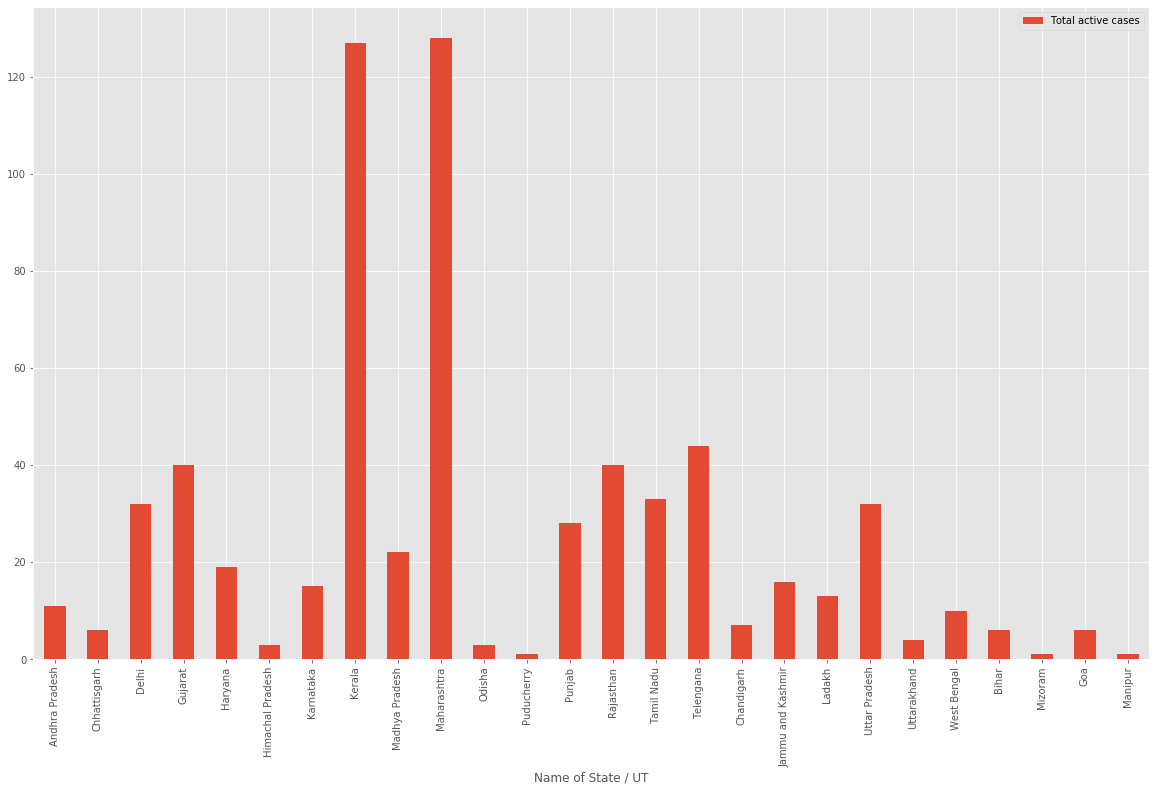

In [108]:
#Pandas Default Visualtion
df.plot(kind = 'bar', x = 'Name of State / UT', y = 'Total active cases')

<BarContainer object of 26 artists>

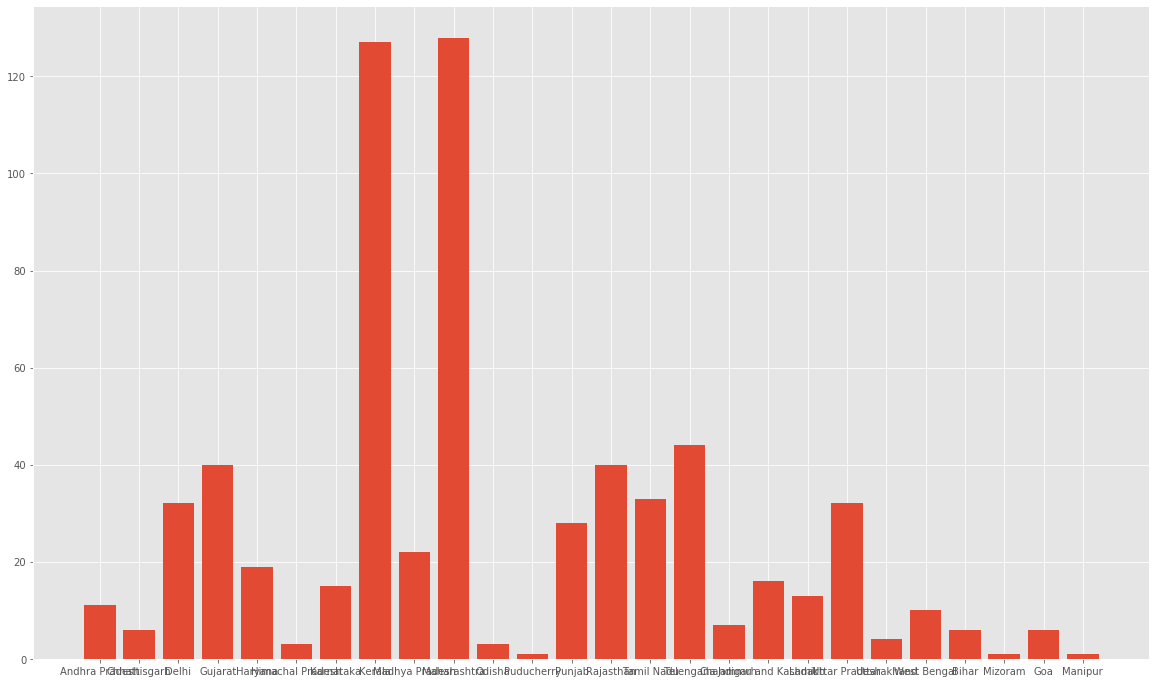

In [109]:
#Matplotlib Visualisation

plt.bar(df['Name of State / UT'], df['Total active cases'])

In [51]:
#Plotly

df.iplot(kind = 'bar', x = 'Name of State / UT', y = 'Total active cases')

In [52]:
#Plotly express

px.bar(df,x = 'Name of State / UT', y = 'Total active cases')

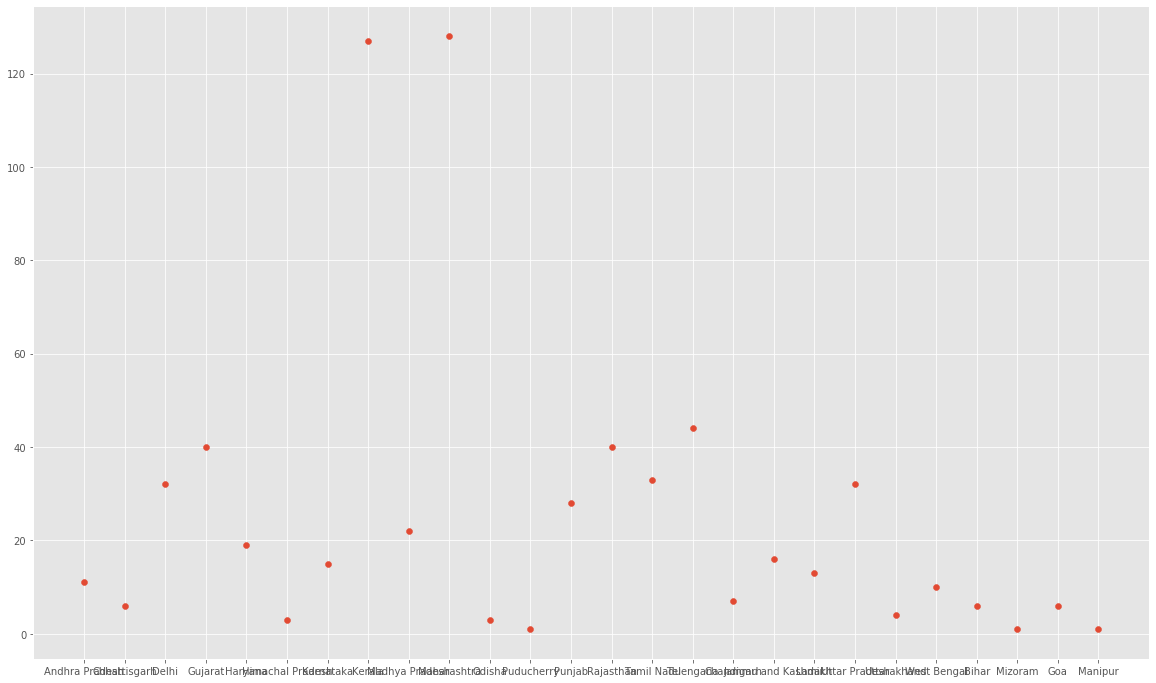

In [110]:
plt.scatter(df['Name of State / UT'], df['Total active cases'])

In [68]:
#Scatterplot Plotly

df.iplot(kind = 'scatter', x = 'Name of State / UT', y = 'Total active cases', mode = 'markers+lines', title = "Statewise Active Cases", yTitle= "Total Cases",size = 15 ,colors = 'Red', xTitle="Name of State / UT" )

In [73]:
#Plotly Express

px.scatter(df,x = 'Name of State / UT', y = 'Total active cases',)

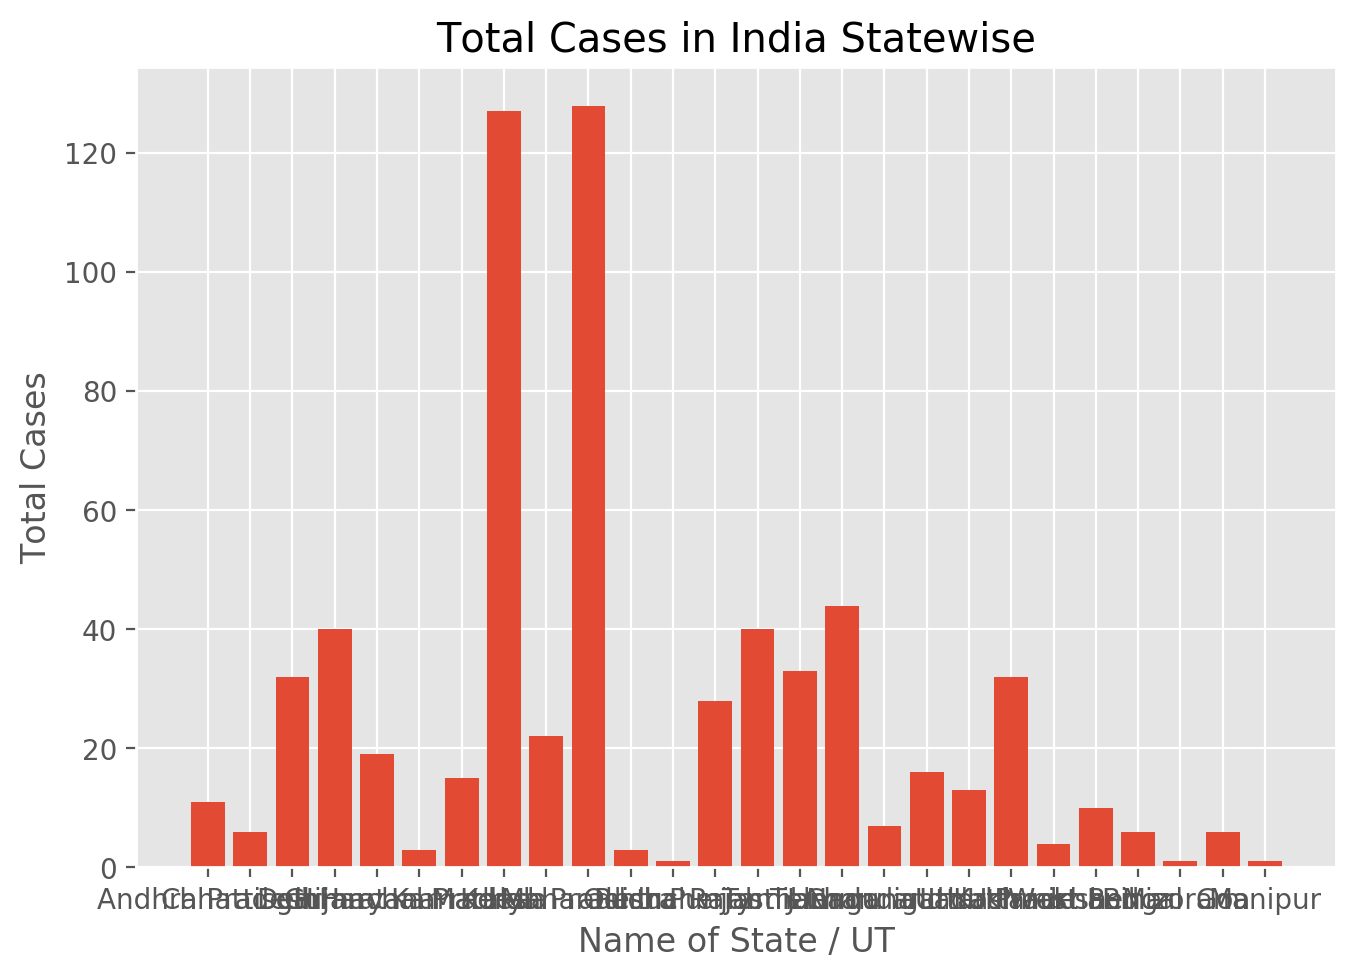

In [113]:
#Obj Oriented Vis
#MatPlotLib

fig = plt.figure(dpi = 200)
axes = fig.add_axes([0,0,1,1]) #left, bottom, width, height
axes.bar(df['Name of State / UT'], df['Total active cases'])
axes.set_title("Total Cases in India Statewise")
axes.set_xlabel("Name of State / UT")
axes.set_ylabel("Total Cases")
plt.show()


In [90]:
#plotly
fig = go.Figure()
fig.add_trace(go.Bar(x = df['Name of State / UT'], y =df['Total active cases']))
fig.update_layout(title = "Total Cases in INDIA Statewise", xaxis=dict(title = "Name of State / UT"), yaxis = dict(title = "Total Cases"))

In [115]:
Indian_Cord = pd.read_excel("Indian Coordinates.xlsx")

In [116]:
Indian_Cord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [117]:
df_full = pd.merge(Indian_Cord,df,on = 'Name of State / UT')

In [124]:
df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total,Total active cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
6,Punjab,31.519974,75.980003,29,0,0,1,29,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33


In [135]:
map = folium.Map(location= [20,70], zoom_start=4.5, tiles = "Stamenterrain")

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full["Total active cases"],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius = value * 0.3, popup = ('<strong>State</strong>: ' +str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' +str(value)+'<br>'),color = 'red', fill_color = 'red', fill_opacity = 0.3).add_to(map)

In [136]:
map

In [137]:
#How corona Virus is rising Globally

In [143]:
dbd_India = pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="India")
dbd_Italy = pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="Italy")
dbd_Korea = pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
dbd_Wuhan = pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="Wuhan")

In [145]:
dbd_Italy

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-31,2,2,NaN
1,2020-02-01,2,0,NaN
2,2020-02-02,2,0,NaN
3,2020-02-03,2,0,NaN
4,2020-02-04,2,0,NaN
5,2020-02-05,2,0,NaN
6,2020-02-06,3,1,NaN
7,2020-02-07,3,0,NaN
8,2020-02-08,3,0,NaN
9,2020-02-09,3,0,NaN


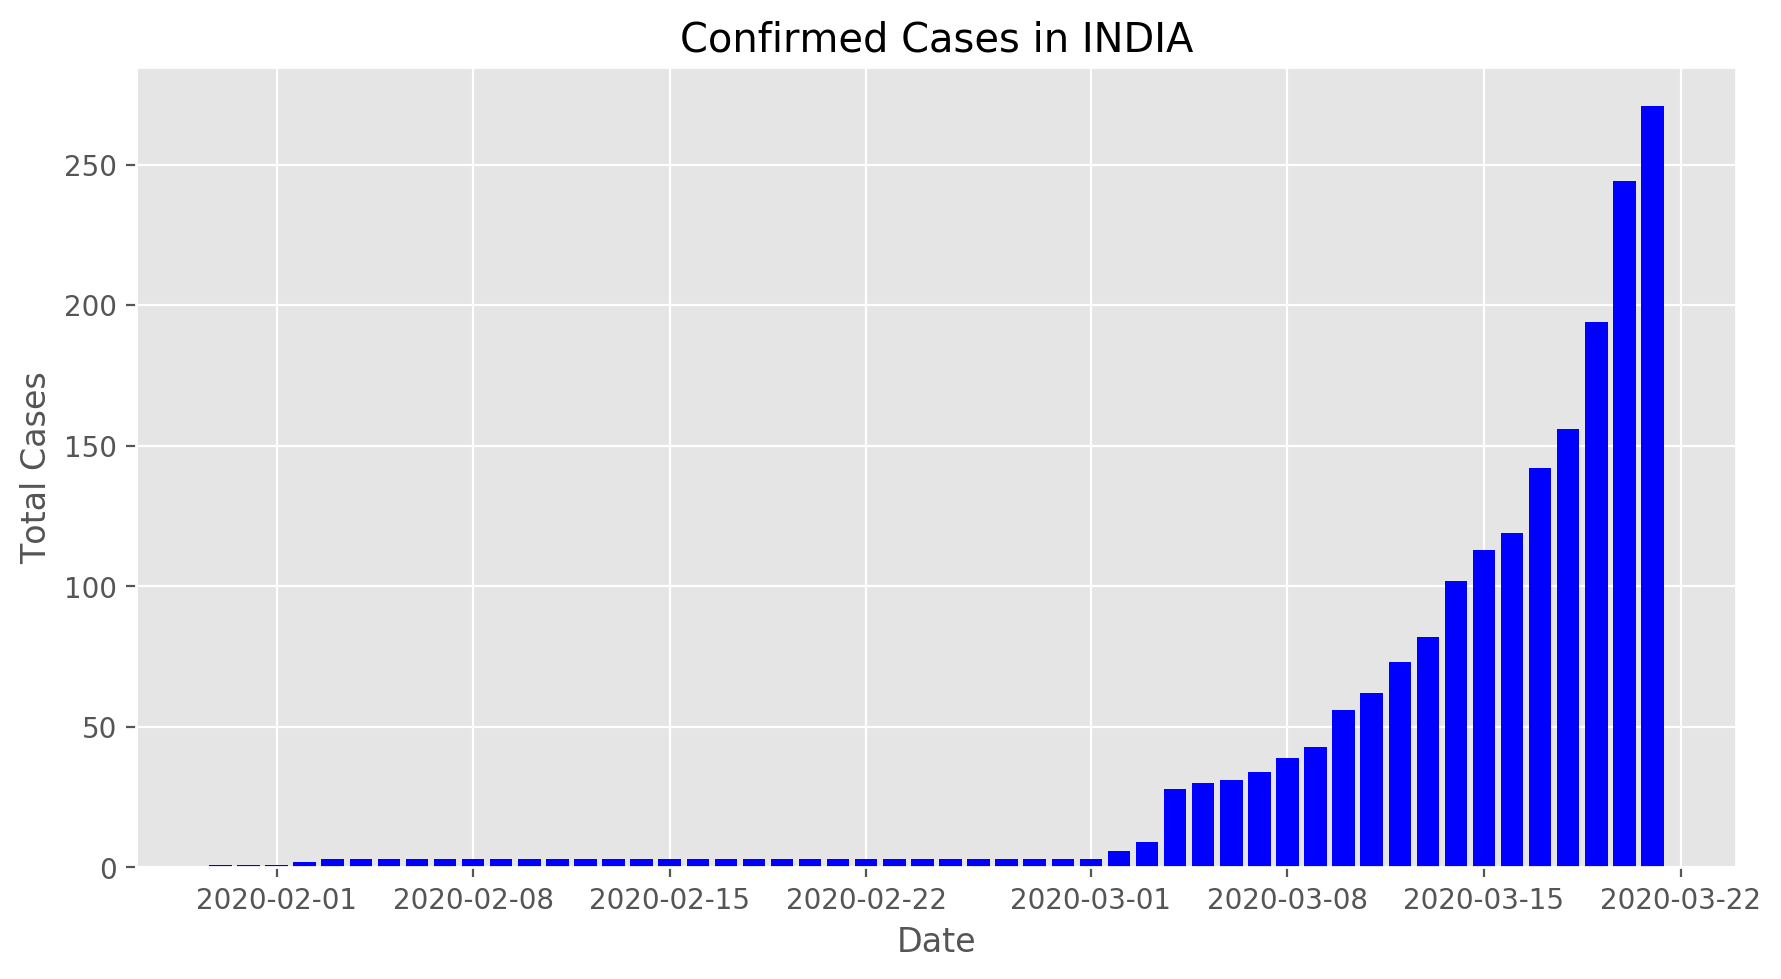

In [153]:
fig = plt.figure(figsize=(10,5),dpi = 200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_India["Date"],dbd_India["Total Cases"],color = "blue")
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed Cases in INDIA")
plt.show()

In [161]:
#plotly express


fig = px.bar(dbd_India, x ="Date",y ="Total Cases", color="Total Cases",title="Confirmed cases india")
fig.show()

fig = px.bar(dbd_Italy, x ="Date",y ="Total Cases", color="Total Cases",title="Confirmed cases Italy")
fig.show()

fig = px.bar(dbd_Wuhan, x ="Date",y ="Total Cases", color="Total Cases",title="Confirmed cases Wuhan")
fig.show()

fig = px.bar(dbd_Korea, x ="Date",y ="Total Cases", color="Total Cases",title="Confirmed cases Korea")
fig.show()

